# Foundations 3: Lab on connectivity and graph theory
- Instructor: Ruben Sanchez-Romero
- T.A: Jaleesa Longfellow

## 1. load packages

In [1]:
# for mathematical operations on arrays: https://numpy.org/
import numpy as np 

# for plotting: https://matplotlib.org/
import matplotlib.pyplot as plt

# for statistical analysis: https://scipy.org/
from scipy import stats

## need to decide the FC analysis

# for graph theory we will used a Python implementation of Brain Connectivity Toolbox BCT (Matlab native)
# https://pypi.org/project/bctpy/
# repository: https://github.com/aestrivex/bctpy (go here to explore the functions)
# For documentation and search about functions see the website below:
# https://sites.google.com/site/bctnet/ (Search bar in the top right)

# if bctpy package not installed:
# in a terminal window from Jupyter type: pip install bctpy
# then Restart the kernel and run this cell again
import bct as bct

## 2. Build two graphical models

In [2]:
# 1. Define number of nodes
num_nodes_model = 128

print(f'num_nodes_model = {num_nodes_model}')

num_nodes_model = 128


In [3]:
# 2. Define number of undirected edges (won't be covering directed networks in this lab)
num_poss_edges_model = (num_nodes_model * (num_nodes_model-1))/2  # number of possible undirected edges
density_model = 0.30 # density = % of num_poss_edges
num_edges_model = int(np.round(num_poss_edges_model*density_model)) # round to get an integer

print(f'num_poss_edges_model = {int(num_poss_edges_model)}')
print(f'density_model = {density_model}')
print(f'num_edges_model = {int(num_edges_model)}')

num_poss_edges_model = 8128
density_model = 0.3
num_edges_model = 2438


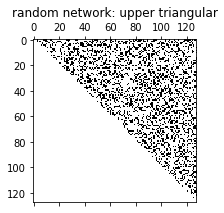

In [4]:
# 3. Call bct to generate a random network: it connects pair of nodes with the same probability p
# (seed parameter is the random seed and it is used for reproducibility)
graph_random_upt = bct.makerandCIJ_und(n=num_nodes_model,
                                       k=num_edges_model, 
                                       seed = 100)

# plot the resulting graph (binary: edge or no edge)
plt.figure(figsize=(3,3))
plt.spy(graph_random_upt)
plt.title('random network: upper triangular')
plt.show()

In [5]:
# To see a general description of the function and the inputs (parameters) and outputs (returns),
# use a question mark "?" next to the name of the function as below:
bct.makerandCIJ_und?

Signature: bct.makerandCIJ_und(n, k, seed=None)
Docstring:
This function generates an undirected random network

Parameters
----------
N : int
    number of vertices
K : int
    number of edges
seed : hashable, optional
    If None (default), use the np.random's global random state to generate random numbers.
    Otherwise, use a new np.random.RandomState instance seeded with the given value.

Returns
-------
CIJ : NxN np.ndarray
    undirected random connection matrix

Notes
-----
no connections are placed on the main diagonal.
File:      ~/anaconda3/lib/python3.7/site-packages/bct/algorithms/reference.py
Type:      function


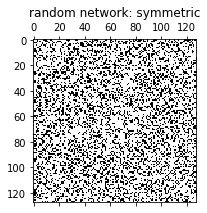

In [6]:
# 3.A. bct.makerandCIJ_und produces an upper triangular matrix. We want a symmetric matrix
graph_random = (graph_random_upt + graph_random_upt.T) != 0 

# plot the resulting graph (binary: edge or no edge)
plt.figure(figsize=(3,3))
plt.spy(graph_random)
plt.title('random network: symmetric')
plt.show()

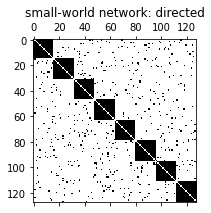

In [7]:
##TODO: fix density of small-world model

# 4. Call bct to generate a modular small-world network
# (sz_cl parameter defines the number of nodes in a clusters)
graph_smallworld_dir = bct.makeevenCIJ(n = num_nodes_model, 
                                       k = num_edges_model, 
                                       sz_cl = 4, 
                                       seed = 100)

# plot the graph
plt.figure(figsize=(3,3))
plt.spy(graph_smallworld_dir)
plt.title('small-world network: directed')
plt.show()

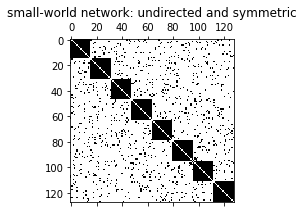

In [8]:
# 4.A. bct.makeevenCIJ produces a directed network, so we want to make it undirected and symmetrix
graph_smallworld = (graph_smallworld_dir + graph_smallworld_dir.T) != 0

# plot the graph
plt.figure(figsize=(3,3))
plt.spy(graph_smallworld)
plt.title('small-world network: undirected and symmetric')
plt.show()

## 3. Compute basic descriptive metrics

### nodes, edges and density

In [9]:
# Since we are working with symmetric matrices we can use numpy tools

# first do it for the random network
print(f'random network')

# 1. Compute the number of nodes 
# np.shape output the size of the matrix (rows,columns), for our symmetric case rows = columns,
# and they correspond to the number of nodes in the graph
n_nodes = np.shape(graph_random)[0]
print(f'number of nodes = {n_nodes}')
# 2. Compute number of edges
n_edges = np.sum(np.sum(graph_random != 0))/2
print(f'number of edges = {int(n_edges)}')
# 3. Compute density of the undirected network
n_poss_edges = ((n_nodes)*(n_nodes-1))/2
density = n_edges/n_poss_edges
print(f'density = {density:.2f}')
print('')

# repeat for the small-world network
print(f'small-world network')

# 1. Compute the number of nodes 
n_nodes = np.shape(graph_smallworld)[0]
print(f'number of nodes = {n_nodes}')
# 2. Compute number of edges
n_edges = np.sum(np.sum(graph_smallworld != 0))/2
print(f'number of edges = {int(n_edges)}')
# 3. Compute density of the undirected network
n_poss_edges = ((n_nodes)*(n_nodes-1))/2
density = n_edges/n_poss_edges
print(f'density = {density:.2f}')

random network
number of nodes = 128
number of edges = 2438
density = 0.30

small-world network
number of nodes = 128
number of edges = 1470
density = 0.18


### degree
The degree of a node is the number of edges connected to such node.

random network


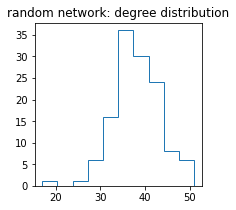

degree distribution mean = 38.09
degree distribution standard deviation = 5.31

small-world network


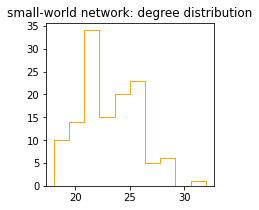

degree distribution mean = 22.97
degree distribution standard deviation = 2.58



In [10]:
# as before we can use numpy tools to compute the degree of the undirected network
# first do it for the random network
print(f'random network')
# 1. First compute the degree for each node independently
# this will output a vector where each entry contains the degree of each ordered node
degree_distribution = np.sum(graph_random != 0, axis=1)

# 2. We can do a histogram of the distribution to explore the variability of the degree across nodes
plt.figure(figsize=(3,3))
plt.hist(degree_distribution,histtype='step')
plt.title('random network: degree distribution')
plt.show()
# this kind of normal distribution of degree distribution is characteristic of random networks

# 3. Now compute the mean and standard deviation of the degree distribution
degree_mean = np.mean(degree_distribution)
print(f'degree distribution mean = {degree_mean:.2f}')
degree_stdev = np.std(degree_distribution)
print(f'degree distribution standard deviation = {degree_stdev:.2f}')
print('')

########
# Repear for the small-world network

print(f'small-world network')
# 1. Compute degree distribution
degree_distribution = np.sum(graph_smallworld != 0, axis=1)
# 2. Plot degree distribution
plt.figure(figsize=(3,3))
plt.hist(degree_distribution,histtype='step',color='orange')
plt.title('small-world network: degree distribution')
plt.show()
# this kind of normal distribution of degree distribution is characteristic of random networks

# 3. Mean and standard deviation of the degree distribution
degree_mean = np.mean(degree_distribution)
print(f'degree distribution mean = {degree_mean:.2f}')
degree_stdev = np.std(degree_distribution)
print(f'degree distribution standard deviation = {degree_stdev:.2f}')
print('')

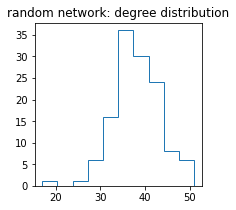

degree distribution mean = 38.09
degree distribution standard deviation = 5.31



In [11]:
# We can also use the degree function in bct
# see https://github.com/aestrivex/bctpy/blob/master/bct/algorithms/degree.py
# and find the function "degrees_und" to see how it was computed

deg_dist = bct.degrees_und(graph_random)
plt.figure(figsize=(3,3))
plt.hist(deg_dist,histtype='step')
plt.title('random network: degree distribution')
plt.show()
deg_mean = np.mean(deg_dist)
print(f'degree distribution mean = {deg_mean:.2f}')
deg_stdev = np.std(deg_dist)
print(f'degree distribution standard deviation = {deg_stdev:.2f}')
print('')

## 4. Graph Theory measures
For the full list of available measures go to https://sites.google.com/site/bctnet/list-of-measures?authuser=0

### Clustering coefficient
The clustering coefficient measures the fraction of node’s neighbors that are neighbors of each other.

<img src="clustering_coefficient.png"  width="600" height="211">

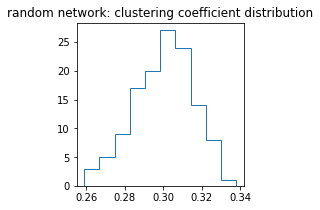

clustering coefficient distribution mean = 0.30
clustering coefficient distribution standard deviation = 0.02



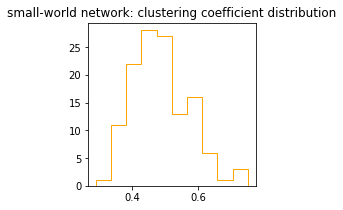

clustering coefficient distribution mean = 0.49
clustering coefficient distribution standard deviation = 0.09



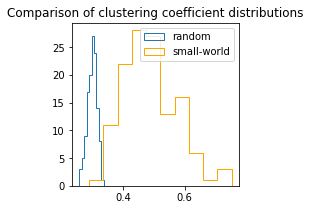

In [12]:
# as we did for degree, compute the distribution, plot it and then the mean and standard deviation

# First for the random network
# distribution of the clustering coefficient
cluster_coeff_dist_rd = bct.clustering_coef_bu(graph_random)
# plot
plt.figure(figsize=(3,3))
plt.hist(cluster_coeff_dist_rd,histtype='step')
plt.title('random network: clustering coefficient distribution')
plt.show()
# mean and standard deviation
cc_mean = np.mean(cluster_coeff_dist_rd)
print(f'clustering coefficient distribution mean = {cc_mean:.2f}')
cc_stdev = np.std(cluster_coeff_dist_rd)
print(f'clustering coefficient distribution standard deviation = {cc_stdev:.2f}')
print('')

# Now for the small world network
cluster_coeff_dist_sm = bct.clustering_coef_bu(graph_smallworld)
# plot
plt.figure(figsize=(3,3))
plt.hist(cluster_coeff_dist_sm,histtype='step',color='orange')
plt.title('small-world network: clustering coefficient distribution')
plt.show()
# mean and standard deviation
cc_mean = np.mean(cluster_coeff_dist_sm)
print(f'clustering coefficient distribution mean = {cc_mean:.2f}')
cc_stdev = np.std(cluster_coeff_dist_sm)
print(f'clustering coefficient distribution standard deviation = {cc_stdev:.2f}')
print('')

# we can overlap the histograms to visualize the differences in the distributions
plt.figure(figsize=(3,3))
plt.hist(cluster_coeff_dist_rd,histtype='step',label='random')
plt.hist(cluster_coeff_dist_sm,histtype='step',color='orange',label='small-world')
plt.legend()
plt.title('Comparison of clustering coefficient distributions')
plt.show()

### Shortest path length

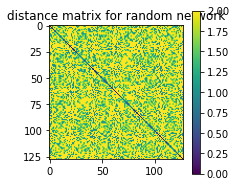

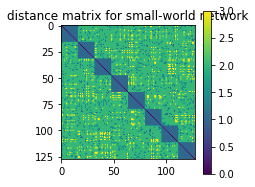

In [34]:
# The shortest path length between two nodes is the minimum number of edges 
# that have to be traversed to go from one node to the other

# Use the distance function to compute the shortest path length between all pair of nodes.
# The output is a distance matrix where mat(i,j) is the shortest path length

# Obtain the distance matrix for the random network
dist_mat_rd = bct.distance_bin(graph_random)
# plot the distance matrix
plt.figure(figsize=(3,3))
plt.imshow(dist_mat_rd,interpolation=None)
# to show the colorbar
plt.colorbar()
plt.title('distance matrix for random network')
plt.show()

# Now for small-world network
dist_mat_sm = bct.distance_bin(graph_smallworld)
# plot the distance matrix
plt.figure(figsize=(3,3))
plt.imshow(dist_mat_sm,interpolation=None)
# to show the colorbar
plt.colorbar()
plt.title('distance matrix for small-world network')
plt.show()

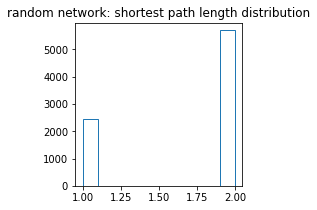

shortest path length distribution mean = 1.70
shortest path length distribution standard deviation = 0.46



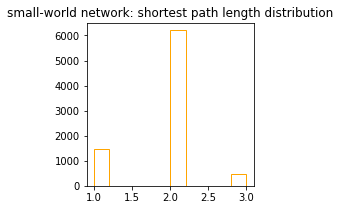

shortest path length distribution mean = 1.88
shortest path length distribution standard deviation = 0.47



In [43]:
# It also useful to visualize this information as a distribution
# in this case the shortest path length distribution of the network

# Since this is a symmetric matrix we can only take the upper triangular elments of the matrix.
# We also do not care about the diagonal mat(i,i), for which the shortest path length is set as zero

# First find the indices of the upper triangular elements
ut_idx = np.triu_indices(num_nodes_model,k=1)

# plot the distribution for random network
plt.figure(figsize=(3,3))
plt.hist(dist_mat_rd[ut_idx],histtype='step')
plt.title('random network: shortest path length distribution')
plt.show()
# mean and standard deviation
spl_mean = np.mean(dist_mat_rd[ut_idx])
print(f'shortest path length distribution mean = {spl_mean:.2f}')
spl_stdev = np.std(dist_mat_rd[ut_idx])
print(f'shortest path length distribution standard deviation = {spl_stdev:.2f}')
print('')

# plot the distribution for small-world network
plt.figure(figsize=(3,3))
plt.hist(dist_mat_sm[ut_idx],histtype='step',color='orange')
plt.title('small-world network: shortest path length distribution')
plt.show()
# mean and standard deviation
spl_mean = np.mean(dist_mat_sm[ut_idx])
print(f'shortest path length distribution mean = {spl_mean:.2f}')
spl_stdev = np.std(dist_mat_sm[ut_idx])
print(f'shortest path length distribution standard deviation = {spl_stdev:.2f}')
print('')

In [53]:
# The characteristic path length is the average shortest shortest path length in the network
# As you can see, we computed it above as the mean of the upper triangular of the distance matrix

# We can use bct.charpath to compute it. It takes as input a distance matrix (as the one computed above)
# Note the [0] at the end to indicate that we only want the first output of the function.
# You can explore the function (bct.charpath?) to see the rest of the outputs.

# compute for the random network
charpath_rd = bct.charpath(dist_mat_rd,include_diagonal=False)[0]
print(f'random network characteristic path length = {charpath_rd:.2f}')

# and for the small-world network
charpath_sm = bct.charpath(dist_mat_sm,include_diagonal=False)[0]
print(f'small-world network characteristic path length = {charpath_sm:.2f}')


random network characteristic path length = 1.70
small-world network characteristic path length = 1.88


In [57]:
# A characteristic of small-world networks is that they have
# a small characteristc path length (average shortest path length) AND a large average clustering coefficient

print('Small-world network')
print(f'-characteristic path length = {charpath_sm:.2f}')
print(f'-average clustering coefficient = {np.mean(cluster_coeff_dist_sm):.2f}')
print('')
print('Random network')
print(f'-characteristic path length = {charpath_rd:.2f}')
print(f'-average clustering coefficient = {np.mean(cluster_coeff_dist_rd):.2f}')

Small-world network
-characteristic path length = 1.88
-average clustering coefficient = 0.49

Random network
-characteristic path length = 1.70
-average clustering coefficient = 0.30


### Betweenness centrality
Node betweenness centrality is the fraction of all shortest paths in the network that contain a given node. Nodes with high values of betweenness centrality participate in a large number of shortest paths.

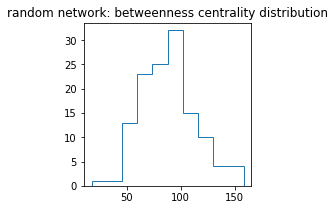

betweenness centrality distribution mean = 88.91
betweenness centrality distribution standard deviation = 25.21



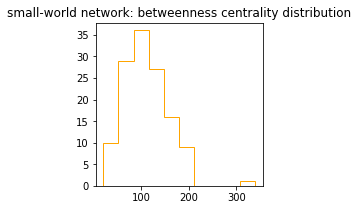

betweenness centrality distribution mean = 111.19
betweenness centrality distribution standard deviation = 46.59



In [67]:
# The bct.betweenness function compute the betweeness centrality for each node in the graph.

# Compute for the random network, plot the distribution, and meand and standard deviation
betw_cent_rd = bct.betweenness_bin(graph_random)
# plot
plt.figure(figsize=(3,3))
plt.hist(betw_cent_rd,histtype='step')
plt.title('random network: betweenness centrality distribution')
plt.show()
# mean and standard deviation
bc_mean = np.mean(betw_cent_rd)
print(f'betweenness centrality distribution mean = {bc_mean:.2f}')
bc_stdev = np.std(betw_cent_rd)
print(f'betweenness centrality distribution standard deviation = {bc_stdev:.2f}')
print('')

# now for the small-world network
betw_cent_sm = bct.betweenness_bin(graph_smallworld)
# plot
plt.figure(figsize=(3,3))
plt.hist(betw_cent_sm,histtype='step',color='orange')
plt.title('small-world network: betweenness centrality distribution')
plt.show()
# mean and standard deviation
bc_mean = np.mean(betw_cent_sm)
print(f'betweenness centrality distribution mean = {bc_mean:.2f}')
bc_stdev = np.std(betw_cent_sm)
print(f'betweenness centrality distribution standard deviation = {bc_stdev:.2f}')
print('')

## 5. Null models
In order to test if graph theory metrics for a particular network are significantly different from a network without structure, we can use the idea of null models.

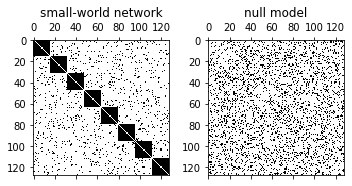


small-world network:
-mean degree = 22.97
-mean clustering coefficient = 0.49
-characteristic path length = 1.88
-mean betweenness centrality = 111.19

null model:
-mean degree = 22.97
-mean clustering coefficient = 0.18
-characteristic path length = 1.83
-mean betweenness centrality = 105.56


In [254]:
# Consider the small-world network from the previous sections.
# We want to keep the number of nodes and number of edges, but we want to destroy the structure.

# One way to destroy the structure is randomize the order of the edges across the network

n_nodes = np.shape(graph_smallworld)[0]
# allocate memory for the null model network (in matrix form)
null_model = np.zeros((n_nodes,n_nodes))
# the undirected network is symmetric so we can do this process only for the upper triangular
# and then symmetrize back
# Get indices of the upper triangular elements
ut_idx = np.triu_indices(n_nodes,k=1)
# extract the 1/0s of the upper triangular (1-edge, 0-no edge)
edges_vector = graph_smallworld[ut_idx]
# randomize the order of the edges
np.random.seed(100) # use this for this lab reproducibility
rand_edges_vector = np.random.choice(edges_vector, size=len(edges_vector), replace=False)
# now assign this vector to the null model
null_model[ut_idx] = rand_edges_vector
# and symmetrize
null_model = (null_model + null_model.T) != 0

# plot the small-world network vs its null model
plt.figure(figsize=(5,5))
# use the next to make a mosaic of plots
plt.subplot(1,2,1)
plt.spy(graph_smallworld)
plt.title('small-world network')
plt.subplot(1,2,2)
plt.spy(null_model)
plt.title('null model')
plt.tight_layout()
plt.show()

# compare the mean degree, mean clustering coefficient, characteristic path length and mean betweeness centrality
print('')
print('small-world network:')
print(f'-mean degree = {np.mean(bct.degrees_und(graph_smallworld)):.2f}')
print(f'-mean clustering coefficient = {np.mean(bct.clustering_coef_bu(graph_smallworld)):.2f}')
print(f'-characteristic path length = {bct.charpath(bct.distance_bin(graph_smallworld))[0]:.2f}')
print(f'-mean betweenness centrality = {np.mean(bct.betweenness_bin(graph_smallworld)):.2f}')

print('')
print('null model:')
print(f'-mean degree = {np.mean(bct.degrees_und(null_model)):.2f}')
print(f'-mean clustering coefficient = {np.mean(bct.clustering_coef_bu(null_model)):.2f}')
print(f'-characteristic path length = {bct.charpath(bct.distance_bin(null_model))[0]:.2f}')
print(f'-mean betweenness centrality = {np.mean(bct.betweenness_bin(null_model)):.2f}')

### Permutation testing

In order to obtain a statistically significant comparison of graph theory metrics, we can use a permutation test in which we produce a series of N null models and compare our graph metrics to those of the null model distribution.

In [255]:
# As above we need to create a null model but this time we need to repeat that process N times.

# It is easier to create a function that generates a null model and then call that function the times
# we need it. See above for the description of each step in the function.

def null_model_generator(graph):
    n_nodes = np.shape(graph)[0]
    null_model = np.zeros((n_nodes,n_nodes))
    ut_idx = np.triu_indices(n_nodes,k=1)
    edges_vector = graph[ut_idx]
    rand_edges_vector = np.random.choice(edges_vector, size=len(edges_vector), replace=False)
    null_model[ut_idx] = rand_edges_vector
    null_model = (null_model + null_model.T) != 0
    
    return null_model

In [256]:
# Now we can make a for-loop that calls the null_model_generator function N times
number_permutations = 1000
# we need this to define the array to allocate the N null models
n_nodes = np.shape(graph_smallworld)[0]
# allocate an array to save all the N null models: size = nodes x nodes x number of permutations
null_model_all = np.zeros((n_nodes,n_nodes,number_permutations))
# loop 
for N in range(number_permutations):
    null_model_all[:,:,N] = null_model_generator(graph_smallworld)   

In [257]:
# Using null_model_all we can compute the metrics of interest and create a "null distribution" for each metric.
# We are interested in:
# mean clustering coefficient
# characteristic path length
# mean betweenness centrality
# We do not care about mean degree because by construction of the null model, this will be the same

# allocate space for the results
null_distribution_meanCC = np.zeros((number_permutations,1))
null_distribution_ChPL = np.zeros((number_permutations,1)) 
null_distribution_meanBwC = np.zeros((number_permutations,1))

# compute the metric of interest for each null model
for N in range(number_permutations):
    null_distribution_meanCC[N] = np.mean(bct.clustering_coef_bu(null_model_all[:,:,N]))
    null_distribution_ChPL[N] = bct.charpath(bct.distance_bin(null_model_all[:,:,N]))[0]
    null_distribution_meanBwC[N] = np.mean(bct.betweenness_bin(null_model_all[:,:,N]))

pval for small-world graph mean clustering coefficient = 0.0


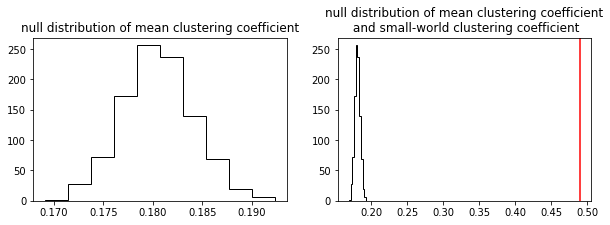

pval for small-world graph characterstic path length = 0.0


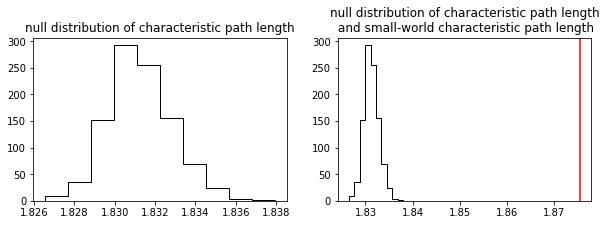

pval for small-world graph mean clustering coefficient = 0.0


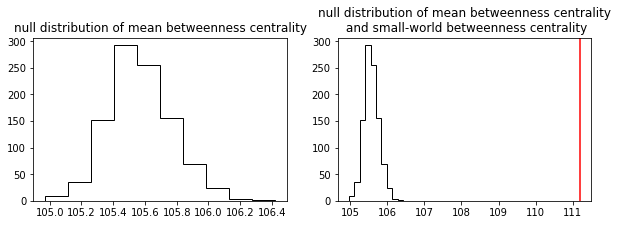

In [258]:
# To determine if our small-world metrics are significantly different from a model without structure (null model)
# we can do the next computation
# permutation p-value = #(metric_nullmodel_n > metric_smallworld) / (number of permutations)
# In words, 
# the number of times our N null model metrics are > than the small-world metric, divided by the number of permutations

# let's do it first for clustering coefficient
# compute the metric of interest for the small-world network
smallworld_meanCC = np.mean(bct.clustering_coef_bu(graph_smallworld))
# compute the permutation pvalue
pval_meanCC = np.sum(null_distribution_meanCC > smallworld_meanCC)/number_permutations
print(f'pval for small-world graph mean clustering coefficient = {pval_meanCC}')
# plot the null distribution for the mean clustering coefficient
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(null_distribution_meanCC,histtype='step',color='black')
plt.title('null distribution of mean clustering coefficient')
plt.subplot(1,2,2)
plt.hist(null_distribution_meanCC,histtype='step',color='black')
plt.title('null distribution of mean clustering coefficient\n and small-world clustering coefficient')
# add a vetical line indicating the position of the small-world mean clustering coefficient
plt.axvline(smallworld_meanCC,color='red')
plt.show()

# now repeat for the other metrics
smallworld_ChPL = bct.charpath(bct.distance_bin(graph_smallworld))[0]
pval_ChPL = np.sum(null_distribution_ChPL > smallworld_ChPL)/number_permutations
print(f'pval for small-world graph characterstic path length = {pval_ChPL}')
# plot the null distribution for the characteristic path length
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(null_distribution_ChPL,histtype='step',color='black')
plt.title('null distribution of characteristic path length')
plt.subplot(1,2,2)
plt.hist(null_distribution_ChPL,histtype='step',color='black')
plt.title('null distribution of characteristic path length\n and small-world characteristic path length')
# add a vetical line indicating the position of the small-world mean clustering coefficient
plt.axvline(smallworld_ChPL,color='red')
plt.show()


smallworld_meanBwC = np.mean(bct.betweenness_bin(graph_smallworld))
# compute the permutation pvalue
pval_meanBwC = np.sum(null_distribution_meanBwC > smallworld_meanBwC)/number_permutations
print(f'pval for small-world graph mean clustering coefficient = {pval_meanBwC}')
# plot the null distribution for the mean betweenness centrality
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(null_distribution_meanBwC,histtype='step',color='black')
plt.title('null distribution of mean betweenness centrality')
plt.subplot(1,2,2)
plt.hist(null_distribution_meanBwC,histtype='step',color='black')
plt.title('null distribution of mean betweenness centrality\n and small-world betweenness centrality')
# add a vetical line indicating the position of the small-world mean clustering coefficient
plt.axvline(smallworld_meanBwC,color='red')
plt.show()

## 6. Starting from data collected from a system of interest

We are researchers that go out and collect data from a system of interest (eg. a human brain).<br>
We hypothesized that the brain is organized as a network and thus want to explore properties of that network.<br>
- To do so, we first need to define our NODES (eg. brain regions), and obtain data for those nodes,
(eg. BOLD timeseries)<br>
- Second, we need to define our EDGES (eg. functional connections), and estimate them from the nodes' data.

### Let's simulate a system of interest

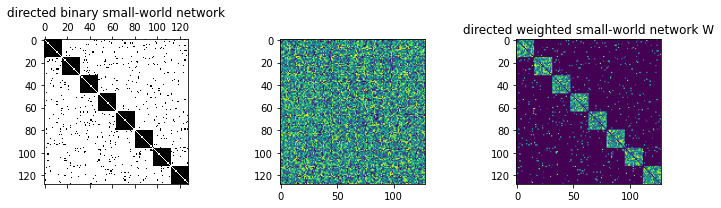

In [259]:
# Let's simulate this situation using a small-world network and creating data for it.
# Let's keep the same parameters as above for the graph.
# IMPORTANT! This time we want the "directed graph", in order to have a causal model to simulate data

graph_smallworld_directed = bct.makeevenCIJ(n = num_nodes_model, 
                                       k = num_edges_model, 
                                       sz_cl = 4, 
                                       seed = 100)


# Now we are going to assign random weights to those binary edges

# First build a weights matrix populated with values from a uniform distribution from +0.1 to +0.7
# get the number of nodes of our graphical model to define the size of the weights matrix
n_nodes = np.shape(graph_smallworld_directed)[0]
np.random.seed(70) # for this lab reproducibility
weights_matrix = np.random.uniform(0.1,0.7,size=(n_nodes,n_nodes))
# now multiply the binary graph (1/0s) by the weights matrix to get only weights for the edges (1s)
# Let's call this directed weighted graph W
W = np.multiply(graph_smallworld_directed,weights_matrix)

#plot
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.spy(graph_smallworld_directed)
plt.title('directed binary small-world network')
plt.subplot(1,3,2)
plt.imshow(weights_matrix)
plt.subplot(1,3,3)
plt.imshow(W)
plt.title('directed weighted small-world network W')
plt.tight_layout()
plt.show()

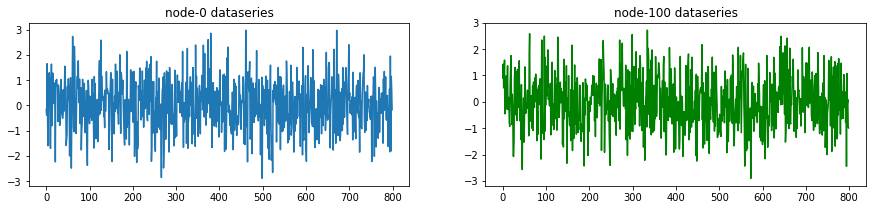

In [260]:
# Now let's create data using the directed weighted model

# We are using the next linear model X = WX + E
# Where X is our dataset (nodes x datapoints), W is the directed weighted matrix (nodes x nodes),
# and E are the intrinsic noise for each node. For example, for a node X that is an effect of Y in the network,
# Y -> X, the linear model is defined as  X = wY + Ex, where w is the weight of the connection,
# and Ex is the intrinsic noise for node X (ie. the activity of X that does not depend on any other node)

# 1. Define E, the intrinsic noise
# First define the sample size. Let's use 800, which is a not uncommon size in fMRI data
sample_size = 800 # number of datapoints
# We will sample the datapoints from a Normal Gaussian distribution with mean 0 and standard deviation 1
np.random.seed(60) # for this lab reproducibility
E = np.random.normal(0,1,size=(n_nodes,sample_size))

# 2. In order to generate X, we need to solve the above model as X = inverse(I-W)E
# I is the identity matrix
I = np.identity(n_nodes)
# solve X = inverse(I-W)E
X = np.dot(np.linalg.inv(I-W),E)
# Finally let's standardize each node independently to get them in the same scale (mean=0, std.dev=1)
X = stats.zscore(X,axis=1)

# 3. Let's plot a couple of the nodes dataseries
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(X[0,:])
plt.title('node-0 dataseries')
plt.subplot(1,2,2)
plt.plot(X[100,:],color='green')
plt.title('node-100 dataseries')
plt.tight_layout
plt.show()

### From dataset X, let's estimate a network

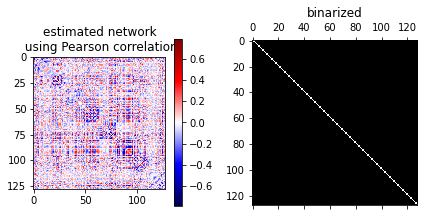

In [310]:
# Now that we collected data X (here via simulation), we want to estimate a network
# the describes the interactions between nodes in X.

# Given that our nodes have linear Gaussian dataseries (X), we can use Pearson's correlation
# to get a measure of the statistical association between nodes.

# This measure of association will represent the EDGES of our network.

# (In the context of brain analysis, the Pearson correlation between nodes (brain regions)
# is usually referred as functional connectivity (FC).
# As mentioned in the fMRI lab there are plenty other methods to estimate FC, but for simplicity
# and given that correlation is still the field standard, let's use it here.)

# compute the Pearson correlation for dataset X to produce an undirected estimate of the network
estim_network = np.corrcoef(X)
# in network estimation we usually set the diagonal to zero. Except if we are considering self-loops.
np.fill_diagonal(estim_network,0)

# plot the estimated network
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(estim_network,cmap='seismic')
plt.title('estimated network\n using Pearson correlation')
plt.colorbar() # need to fix this, plots too big
plt.subplot(1,2,2)
plt.spy(estim_network)
plt.title('binarized')
plt.tight_layout()
plt.show()

Thresholding of estimated network
-target density = 0.20
-density of the thresholded network = 0.20


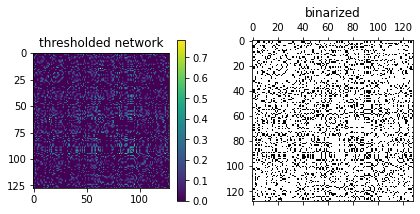

In [306]:
# As you can see from the plots above, this is a full matrix, meaning all entries are non-zero.
# This kind of network is not useful for brain network analysis, since everything is connected with everything,
# A common approach to solve this problem is to threshold the network, by taking for example,
# the strongest positive edges such that we reach a desired density.

# For this lab, let's go with a target density of 20%
num_nodes = np.shape(estim_network)[0]
num_possible_edges = (num_nodes*(num_nodes-1))/2
target_density = 0.20
num_target_edges = int(target_density*num_possible_edges)
print('Thresholding of estimated network')
print(f'-target density = {target_density:.2f}')

# It is common in brain network analysis to take only the positive FCs, let's do that here.
# First order the edges correlation values from larger to smaller, do not consider 0s (non-edges).
# Just take the upper triangular to avoid repeating values (due to symmetry) in the sorting.
ut_idx = np.triu_indices(num_nodes,k=1)
ordered_edges = np.flip(np.sort(estim_network[ut_idx][estim_network[ut_idx]!=0]))
# take the value corresponding to the num_target_edges to use as a cutoff
cutoff = ordered_edges[num_target_edges]
# threshold the network using the cutoff
thresh_network = np.multiply(estim_network,(estim_network > cutoff))
# compute the density of the thresholded network to verify
density_thresh_network = (np.sum(np.sum(thresh_network!=0))/2)/num_possible_edges
print(f'-density of the thresholded network = {density_thresh_network:.2f}')

# plot the thresholded network
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(thresh_network)
plt.title('thresholded network')
plt.colorbar() # need to fix this, plots too big
plt.subplot(1,2,2)
plt.spy(thresh_network)
plt.title('binarized')
plt.tight_layout()
plt.show()